In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dfx=pd.read_csv('weightedX.csv')
dfy=pd.read_csv('weightedY.csv')

In [4]:
dfx.head()

,1.2421
0,2.33480
1,0.13264
2,2.34700
3,6.73890
4,3.70890


In [5]:
dfy.head()

,1.1718
0,1.88240
1,0.34283
2,2.10570
3,1.64770
4,2.36240


In [6]:
X=dfx.values
Y=dfy.values

print(X.shape,Y.shape)

(99, 1) (99, 1)


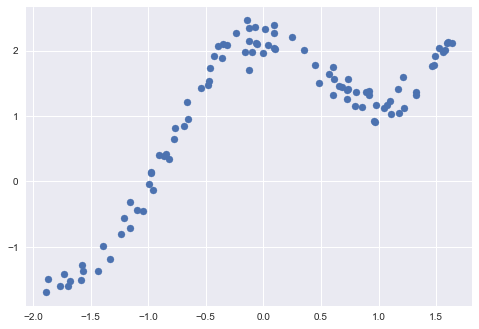

In [7]:
plt.style.use('seaborn')

#Normalise the data
X=(X-X.mean())/X.std()

plt.scatter(X,Y)
plt.show()


### Find out W (m * m )  diagonal matrix  

In [11]:
print(type(np.mat(np.eye(5))))

# ndarray = n dimensional array

<class 'numpy.matrix'>


In [13]:
def getW(query_point,X,tau):
    m=X.shape[0]
    w=np.mat((np.eye(m)))
    
    for i in range(m):
        xi=X[i]
        x=query_point
        w[i,i]=np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return w    

In [16]:
X=np.mat(X)
Y=np.mat(Y)

w=getW(-1,X,1)
print(w.shape)
print(w)

(99, 99)
[[0.81327022 0.         0.         ... 0.         0.         0.        ]
 [0.         0.98353311 0.         ... 0.         0.         0.        ]
 [0.         0.         0.81193405 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.59936711 0.         0.        ]
 [0.         0.         0.         ... 0.         0.2758226  0.        ]
 [0.         0.         0.         ... 0.         0.         0.08496804]]


### Make Predictions

In [25]:
def pred(X,Y,query_x,tau):
    ones=np.ones((X.shape[0],1))
    X_=np.hstack((X,ones))
    
    qx=np.mat([query_x,1])
    w=getW(qx,X_,tau)
    theta=np.linalg.pinv(X_.T*(w*X_))*(X_.T*(w*Y))
    prediction=np.dot(qx,theta)
    return theta,prediction

In [26]:
theta,prediction=pred(X,Y,1.0,1.0)

In [27]:
print(theta)

[[0.14069504]
 [1.45348191]]


In [29]:
print(prediction)

[[1.59417694]]


### Visualise , predict, analyse the effect of tau

In [30]:
def plot_prediction(tau):
    x_test=np.linspace(-2,2)
    y_test=[]
    
    for qx in x_test:
        theta,prediction=pred(X,Y,qx,tau)
        y_test.append(prediction[0][0])
        
    y_test=np.array(y_test)
    
    yO=np.array(Y)
    xO=np.array(X)
    
    plt.scatter(xO,yO)
    plt.scatter(x_test,y_test,color='red')
    plt.show()

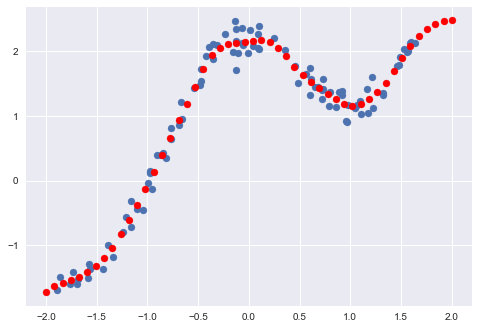

In [33]:
plot_prediction(0.1)

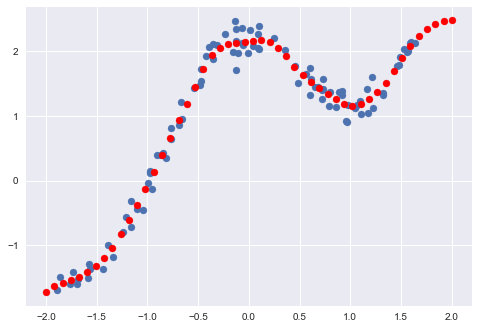

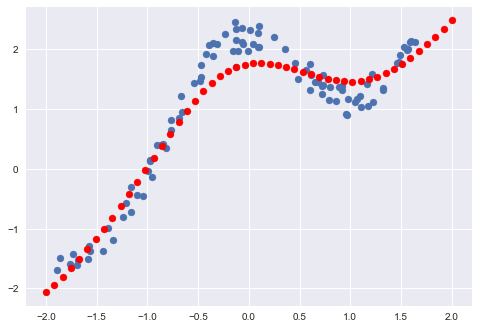

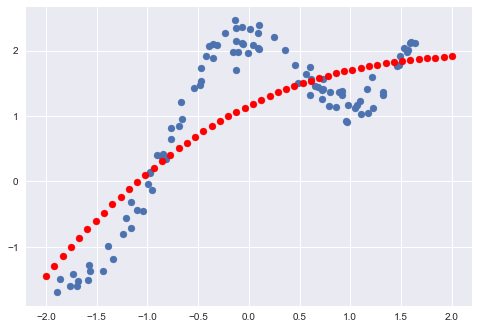

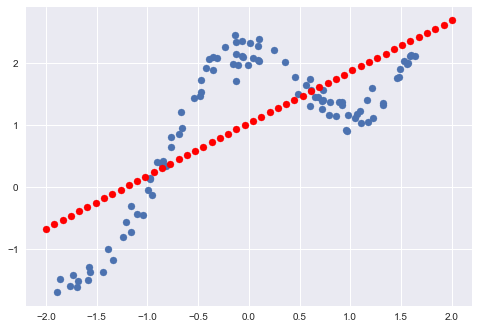

In [35]:
tau=[0.1,0.5,1.5,10]

for t in tau:
    plot_prediction(t)